### Simple DBSCAN

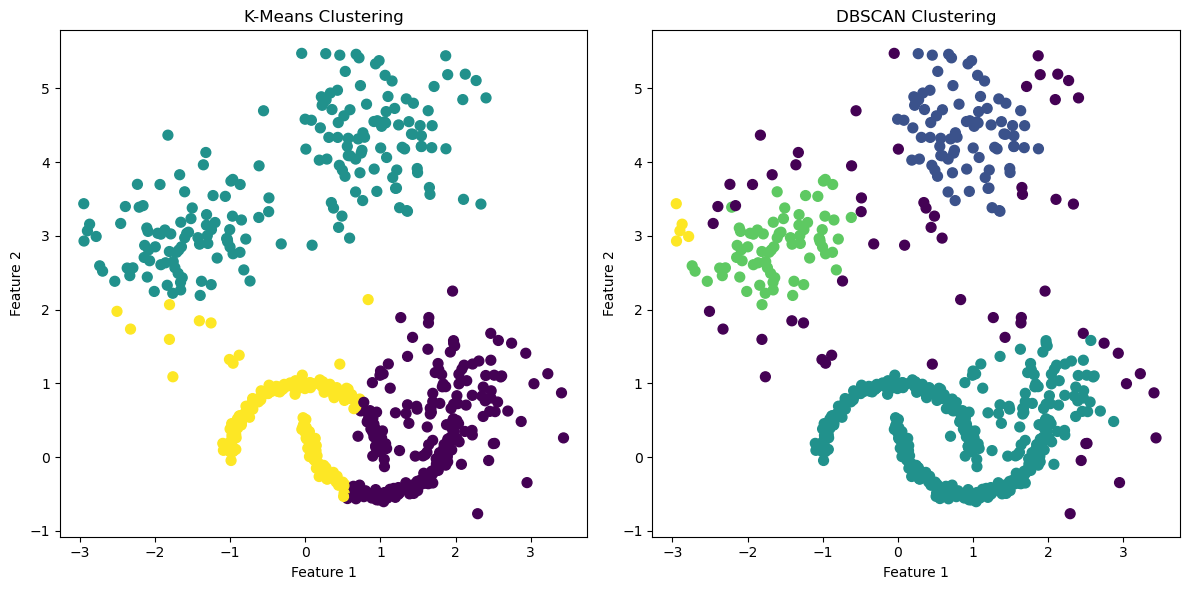

In [14]:
import os
import warnings

# Suppress KMeans memory leak warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN

# Generate blob-shaped clusters
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Generate moon-shaped clusters
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=0)

# Combine the datasets
X = np.vstack((X_blobs, X_moons))

# Apply K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualize the Results
plt.figure(figsize=(12, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


### Mall_Customers

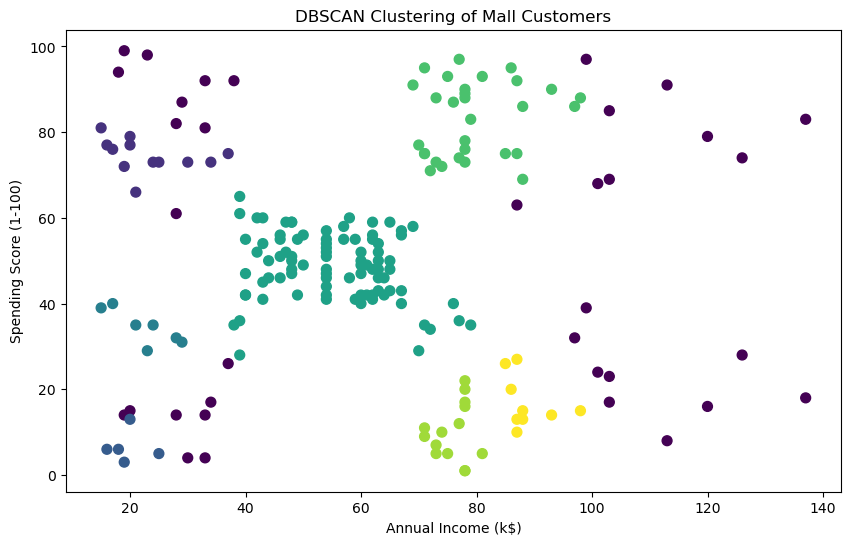

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'Mall_Customers.csv'
data = pd.read_csv(url)

# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


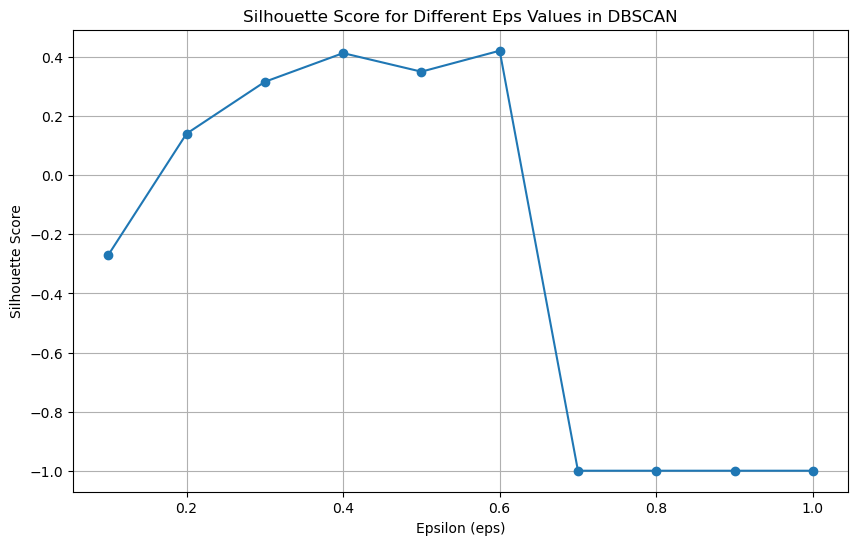

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
url = 'Mall_Customers.csv'
data = pd.read_csv(url)

# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Explore different eps values
eps_values = np.arange(0.1, 1.1, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)
    
    # Only compute silhouette score if there's more than 1 cluster
    if len(set(clusters)) > 1:
        score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Assign a low score if no clusters

# Plot silhouette scores for different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Eps Values in DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [3]:
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


The optimal number of clusters is: 5


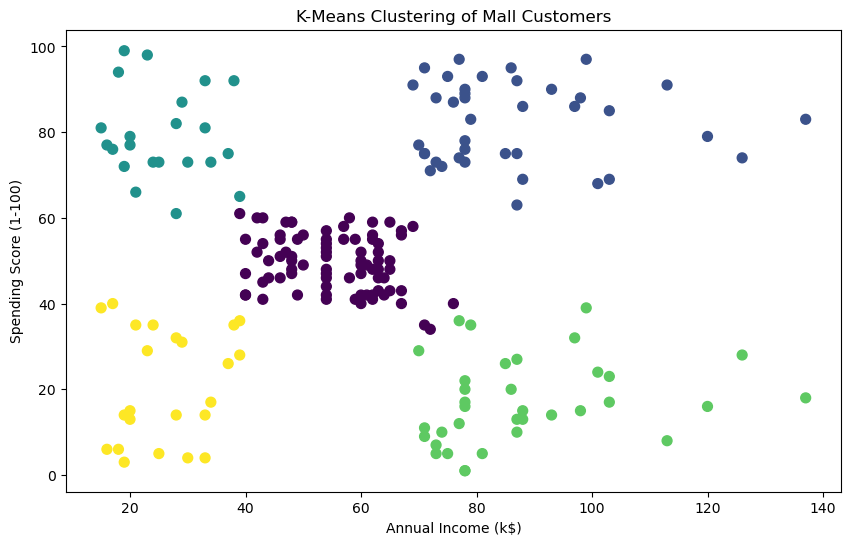

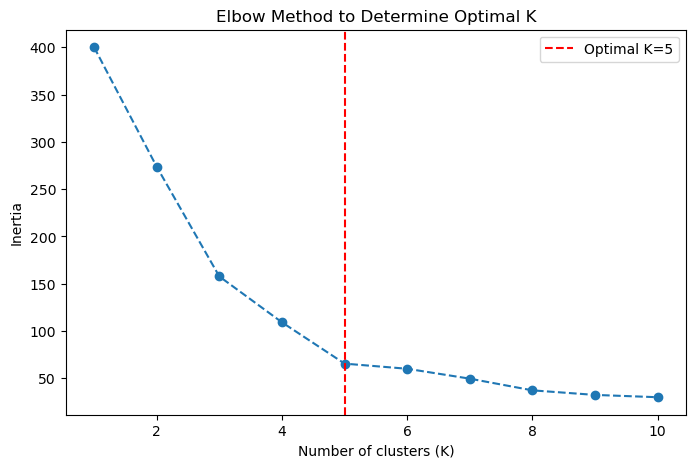

In [13]:
import os
import warnings

# Suppress KMeans memory leak warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Load the dataset
url = 'Mall_Customers.csv'
data = pd.read_csv(url)

# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Find the optimal number of clusters using the Elbow Method
kneedle = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Apply K-means clustering with the optimal number of clusters found by the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Print the optimal number of clusters found
print(f"The optimal number of clusters is: {optimal_k}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()


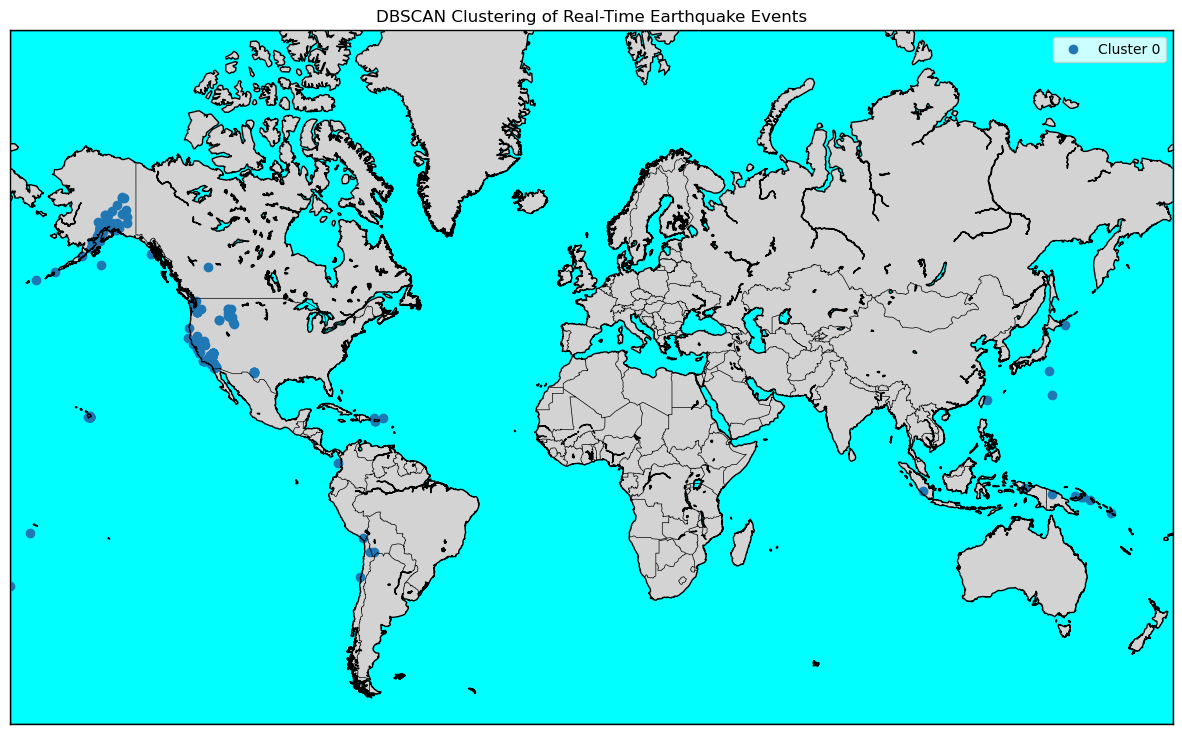

In [10]:
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from numpy import radians

# Fetch real-time earthquake data from the USGS API
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson'
response = requests.get(url)
data = response.json()

# Initialize lists to hold data
lats = []
lons = []
mags = []
places = []

# Extract data from the GeoJSON features
for feature in data['features']:
    coords = feature['geometry']['coordinates']
    lon, lat, _ = coords
    mag = feature['properties']['mag']
    place = feature['properties']['place']
    
    lats.append(lat)
    lons.append(lon)
    mags.append(mag)
    places.append(place)

# Create a DataFrame
df = pd.DataFrame({
    'Latitude': lats,
    'Longitude': lons,
    'Magnitude': mags,
    'Place': places
})

# Remove any entries with missing data
df = df.dropna(subset=['Latitude', 'Longitude', 'Magnitude'])

# Prepare the data for clustering
X = df[['Longitude', 'Latitude']].values

# Set the parameters for DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3, metric='haversine')

# Convert degrees to radians for haversine metric
X_rad = radians(X)

# Fit and predict cluster labels
clusters = dbscan.fit_predict(X_rad)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Initialize the map
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc', resolution='l', area_thresh=1000.0,
            llcrnrlon=-180, llcrnrlat=-60, urcrnrlon=180, urcrnrlat=80)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Map cluster labels to colors
unique_clusters = df['Cluster'].unique()
colors = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_clusters)))

# Plot each cluster
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    x, y = m(cluster_data['Longitude'].values, cluster_data['Latitude'].values)
    if cluster_id == -1:
        # Noise points
        m.scatter(x, y, c='k', marker='x', label='Noise')
    else:
        m.scatter(x, y, c=[colors[cluster_id]], label=f'Cluster {cluster_id}')

plt.title('DBSCAN Clustering of Real-Time Earthquake Events')
plt.legend()
plt.show()


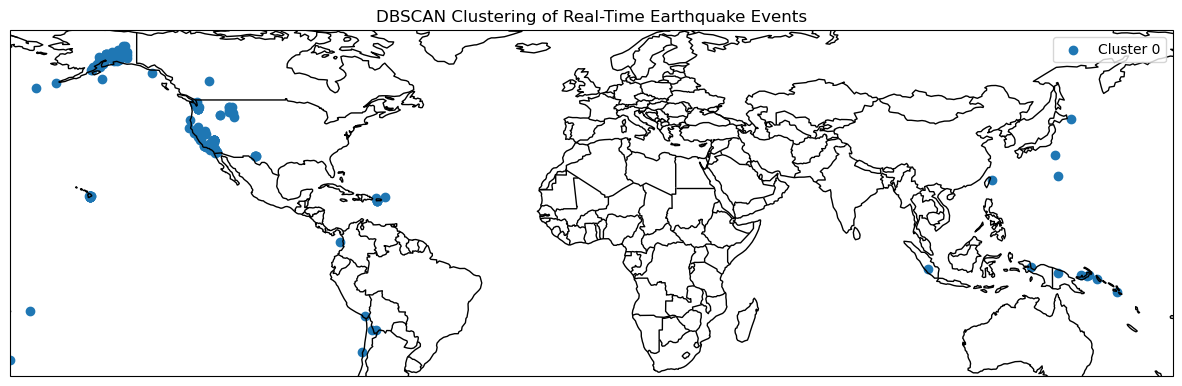

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Ensure you define unique_clusters here
unique_clusters = df['Cluster'].unique()
colors = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_clusters)))

# Plot the clusters using Cartopy
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot each cluster
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    if cluster_id == -1:
        # Noise points
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                    c='k', marker='x', label='Noise', transform=ccrs.Geodetic())
    else:
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                    c=[colors[cluster_id]], label=f'Cluster {cluster_id}', transform=ccrs.Geodetic())

plt.title('DBSCAN Clustering of Real-Time Earthquake Events')
plt.legend()
plt.show()
